<img src='for_markdown/ensemble/1.png'>

<img src='for_markdown/ensemble/2.png'>

In [1]:
# 필요한 모듈 불러오기
%matplotlib inline

import time
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

sns.set()
sns.set_style('white') 
sns.set_color_codes(palette='pastel')

#plt.rcParams['axes.unicode_minus'] = False
#path = 'C:/Windows/Fonts/malgun.ttf'
#font_name = mpl.font_manager.FontProperties(fname=path, size=50).get_name()
#print(font_name)
#plt.rc('font', family=font_name)

In [4]:
root_dir = 'C:/kdev/pythonCode/day3/Data/'
data = pd.read_excel(os.path.join(root_dir,'preprocessed_wdbc_data.xlsx'))

In [5]:
data.head()

ID Diagnosis  Radius  Texture  Perimeter    Area  Smoothness  \
0    842302         M   17.99    10.38     122.80  1001.0     0.11840   
1    842517         M   20.57    17.77     132.90  1326.0     0.08474   
2  84300903         M   19.69    21.25     130.00  1203.0     0.10960   
3  84348301         M   11.42    20.38      77.58   386.1     0.14250   
4  84358402         M   20.29    14.34     135.10  1297.0     0.10030   

   Compactness  Concavity  Concave points  Symmetry  Fractal dimension  
0      0.27760     0.3001         0.14710    0.2419            0.07871  
1      0.07864     0.0869         0.07017    0.1812            0.05667  
2      0.15990     0.1974         0.12790    0.2069            0.05999  
3      0.28390     0.2414         0.10520    0.2597            0.09744  
4      0.13280     0.1980         0.10430    0.1809            0.05883

In [6]:
data.columns

Index(['ID', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area',
       'Smoothness', 'Compactness', 'Concavity', 'Concave points', 'Symmetry',
       'Fractal dimension'],
      dtype='object')

In [7]:
# id를 데이터 index로 만들기
data.set_index(['ID'], inplace = True)

In [8]:
# diagnosis의 'M':1, 'B':0으로 바꾸기
data['Diagnosis'] = data['Diagnosis'].map({'M':1,'B':0})

In [9]:
data.head()

Diagnosis  Radius  Texture  Perimeter    Area  Smoothness  \
ID                                                                    
842302            1   17.99    10.38     122.80  1001.0     0.11840   
842517            1   20.57    17.77     132.90  1326.0     0.08474   
84300903          1   19.69    21.25     130.00  1203.0     0.10960   
84348301          1   11.42    20.38      77.58   386.1     0.14250   
84358402          1   20.29    14.34     135.10  1297.0     0.10030   

          Compactness  Concavity  Concave points  Symmetry  Fractal dimension  
ID                                                                             
842302        0.27760     0.3001         0.14710    0.2419            0.07871  
842517        0.07864     0.0869         0.07017    0.1812            0.05667  
84300903      0.15990     0.1974         0.12790    0.2069            0.05999  
84348301      0.28390     0.2414         0.10520    0.2597            0.09744  
84358402      0.13280     0.1980         0.10430    0.1809            0.05883

In [11]:
X = data.loc[:,data.columns != 'Diagnosis']
y = data.Diagnosis

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 2017020558)

In [13]:
rf_clf = RandomForestClassifier(random_state=2017020558)

In [14]:
np.random.seed(2017020558)
start = time.time()

param_dict = {'max_depth': [2,3,4,5],
             'max_features' : ['auto','sqrt','log2', None],
             'criterion': ['gini','entropy']}

cv_rf = GridSearchCV(rf_clf, cv=5,
                    param_grid=param_dict,
                    n_jobs = 3)

cv_rf.fit(X_train, y_train)

print('Best Parameters using grid search: \n',
     cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {:.2f}'.format(end-start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 4, 'max_features': None}
Time taken in grid search: 3.20


In [15]:
rf_clf.set_params(criterion='entropy', max_depth=4, max_features=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2017020558, verbose=0,
            warm_start=False)

In [16]:
rf_clf.set_params(oob_score=True)

min_estimators = 5
max_estimators = 200

error_rate = {}
for i in range(min_estimators, max_estimators + 1):
    rf_clf.set_params(n_estimators=i)
    rf_clf.fit(X_train, y_train)
    
    oob_error = 1 - rf_clf.oob_score_
    error_rate[i] = oob_error

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably me

In [19]:
error_rate

{5: 0.09547738693467334,
 6: 0.07788944723618085,
 7: 0.07035175879396982,
 8: 0.07035175879396982,
 9: 0.07286432160804024,
 10: 0.07035175879396982,
 11: 0.07035175879396982,
 12: 0.07035175879396982,
 13: 0.06783919597989951,
 14: 0.06030150753768848,
 15: 0.055276381909547756,
 16: 0.05778894472361806,
 17: 0.05276381909547734,
 18: 0.05778894472361806,
 19: 0.05778894472361806,
 20: 0.06030150753768848,
 21: 0.06030150753768848,
 22: 0.06281407035175879,
 23: 0.06281407035175879,
 24: 0.05778894472361806,
 25: 0.05778894472361806,
 26: 0.05778894472361806,
 27: 0.05276381909547734,
 28: 0.05276381909547734,
 29: 0.055276381909547756,
 30: 0.06030150753768848,
 31: 0.06030150753768848,
 32: 0.05778894472361806,
 33: 0.06281407035175879,
 34: 0.06030150753768848,
 35: 0.06030150753768848,
 36: 0.05778894472361806,
 37: 0.05778894472361806,
 38: 0.05778894472361806,
 39: 0.05778894472361806,
 40: 0.05778894472361806,
 41: 0.05778894472361806,
 42: 0.05778894472361806,
 43: 0.05778894

In [20]:
oob_series = pd.Series(error_rate)

In [22]:
type(oob_series)

pandas.core.series.Series

Text(0.5,1,'OOB Error Rate Across various Forest sizes \n(From 5 to 200trees)')

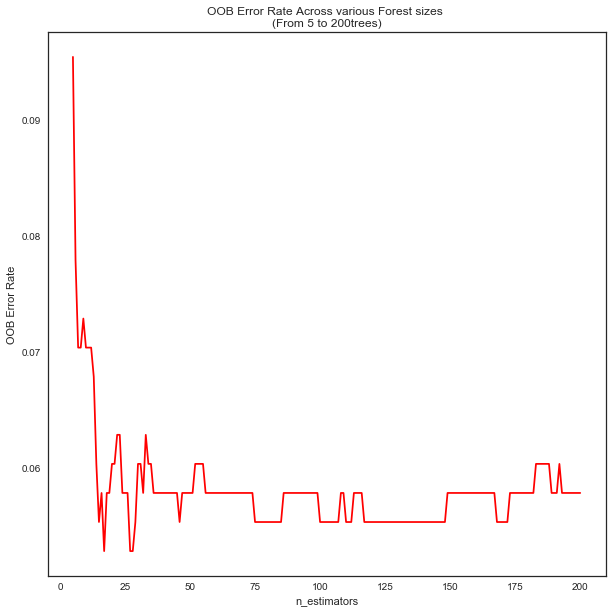

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
oob_series.plot(kind='line',
                color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 5 to 200trees)')

In [24]:
print('OOB Error rate for 100 trees is: {0:.5f}'.format(oob_series[100]))

OOB Error rate for 100 trees is: 0.05528


In [25]:
rf_clf.set_params(n_estimators=100,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=2017020558, verbose=0,
            warm_start=False)

In [26]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=2017020558, verbose=0,
            warm_start=False)

In [27]:
imp = rf_clf.feature_importances_
imp = pd.DataFrame([X.columns, imp]).T
imp.columns = ['variables', 'importance']
sorted_idx = np.argsort(imp['importance'])[::-1]
imp = imp.iloc[sorted_idx,:]
print(imp[imp['importance'] > 0.01])

        variables importance
7  Concave points   0.566812
3            Area    0.16268
1         Texture   0.139373
2       Perimeter  0.0673017
6       Concavity  0.0231538
0          Radius  0.0137978


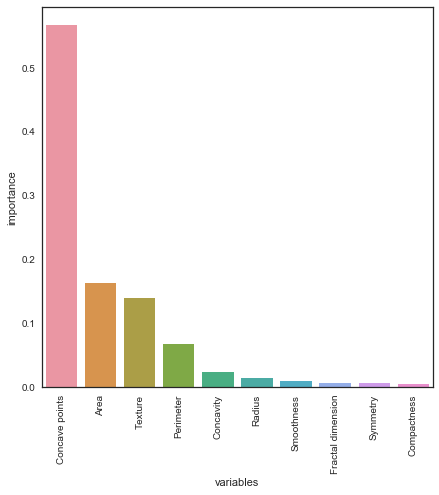

In [28]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='variables', y='importance', data=imp, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show(fig)

In [29]:
y_test_pred = rf_clf.predict(X_test)
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print('- F1 score (Test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Test) : 0.9298
- F1 score (Test) : 0.92


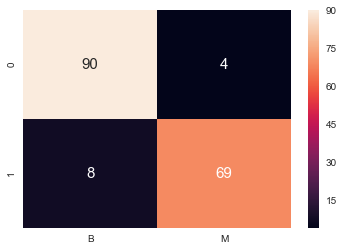

In [30]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test = pd.DataFrame(cm_test, columns=['B', 'M'])
sns.heatmap(data=cm_test, annot=True, annot_kws={'size': 15})